In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

#print file path that includes in certain directory
import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

./data/cellphones ratings.csv
./data/cellphones data.csv
./data/cellphones users.csv


In [134]:
ratings = pd.read_csv('./data/cellphones ratings.csv')

In [135]:
data = pd.read_csv('./data/cellphones data.csv')

In [136]:
users = pd.read_csv('./data/cellphones users.csv')

In [137]:
ratings.head()

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2


In [138]:
data.head()

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,24/09/2021
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,24/09/2021
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,24/09/2021


In [139]:
users.head()

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker


In [140]:
ratings.shape, data.shape, users.shape

((990, 3), (33, 14), (99, 4))

In [141]:
## JOINING THE THREE DATAFRAMES

ratings = ratings.set_index('cellphone_id').join(data)

In [142]:
ratings.head()

,user_id,rating,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,8,5,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
0,16,1,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
0,30,4,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
0,35,6,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022
0,52,5,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,18/03/2022


In [143]:
# Now the column is changed to 16
ratings.shape

(990, 16)

In [144]:
ratings = ratings.set_index('user_id').join(users)

In [145]:
ratings.head()

,rating,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,user_id,age,gender,occupation
0,10,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021,0.0,38.0,Female,Data analyst
0,3,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,0.0,38.0,Female,Data analyst
0,2,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021,0.0,38.0,Female,Data analyst
0,3,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,0.0,38.0,Female,Data analyst
0,9,10,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,0.0,38.0,Female,Data analyst


In [146]:
## The columns is changed to 19 (added 3 columns from users dataframe)
ratings.shape

(990, 19)

In [147]:
from collections import Counter

In [148]:
ratings.describe

<bound method NDFrame.describe of      rating  cellphone_id     brand                 model operating system  \
0        10             3     Apple         iPhone 13 Pro              iOS   
0         3             5     Apple             iPhone XR              iOS   
0         2             8   Samsung            Galaxy A32          Android   
0         3             9   Samsung            Galaxy A53          Android   
0         9            10   Samsung            Galaxy S22          Android   
..      ...           ...       ...                   ...              ...   
258       6            24    Xiaomi         Redmi Note 11          Android   
258       7            26    Xiaomi                12 Pro          Android   
258       8            27    Xiaomi               Poco F4          Android   
258       6            29  Motorola  Moto G Stylus (2022)          Android   
258       5            31  Motorola           Moto G Pure          Android   

     internal memory  RAM  pe

In [149]:
ratings.dtypes

rating                int64
cellphone_id          int64
brand                object
model                object
operating system     object
internal memory       int64
RAM                   int64
performance         float64
main camera           int64
selfie camera         int64
battery size          int64
screen size         float64
weight                int64
price                 int64
release date         object
user_id             float64
age                 float64
gender               object
occupation           object
dtype: object

In [150]:
Counter(ratings.brand)

Counter({'Apple': 165,
         'Samsung': 237,
         'Google': 99,
         'OnePlus': 112,
         'Oppo': 30,
         'Vivo': 24,
         'Motorola': 132,
         'Sony': 26,
         'Xiaomi': 135,
         'Asus': 30})

In [151]:
Counter(ratings.model)

Counter({'iPhone 13 Pro': 29,
         'iPhone XR': 31,
         'Galaxy A32': 39,
         'Galaxy A53': 29,
         'Galaxy S22': 27,
         'Pixel 6a': 31,
         'Nord 2T': 31,
         'Find X5 Pro': 30,
         'X80 Pro': 24,
         'Moto G Play (2021)': 41,
         'iPhone 13 Pro Max': 34,
         'Galaxy A13': 29,
         'Pixel 6 \xa0': 38,
         'Nord N20': 31,
         'Xperia Pro': 26,
         'Moto G Pure': 31,
         'Moto G Power (2022)': 35,
         'iPhone 13 Mini': 24,
         'Galaxy Z Flip 3': 32,
         'Poco F4': 34,
         'iPhone SE (2022)': 20,
         'Galaxy S22 Plus': 22,
         'Pixel 6 Pro\xa0': 30,
         '10 Pro': 30,
         '10T': 20,
         '11T Pro': 38,
         'Moto G Stylus (2022)': 25,
         'Zenfone 8': 30,
         'Galaxy S22 Ultra': 32,
         'Galaxy Z Fold 3': 27,
         'Redmi Note 11': 35,
         '12 Pro': 28,
         'iPhone 13': 27})

In [152]:
Counter(ratings.gender)

Counter({'Female': 140, 'Male': 180, nan: 670})

In [153]:
### Separating the target value of prediction
ratings_pred = ratings['cellphone_id']
ratings = ratings.drop(['cellphone_id'], axis=1)

In [154]:
from sklearn.feature_extraction.text import CountVectorizer

In [155]:
vectorizer = CountVectorizer()

In [156]:
ratings.head()

,rating,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date,user_id,age,gender,occupation
0,10,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,24/09/2021,0.0,38.0,Female,Data analyst
0,3,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,26/10/2018,0.0,38.0,Female,Data analyst
0,2,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,22/01/2021,0.0,38.0,Female,Data analyst
0,3,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,24/03/2022,0.0,38.0,Female,Data analyst
0,9,Samsung,Galaxy S22,Android,128,8,8.81,50,10,3700,6.1,167,528,25/02/2022,0.0,38.0,Female,Data analyst


In [157]:
ratings.isnull().sum()

rating                0
brand                 0
model                 0
operating system      0
internal memory       0
RAM                   0
performance           0
main camera           0
selfie camera         0
battery size          0
screen size           0
weight                0
price                 0
release date          0
user_id             670
age                 670
gender              670
occupation          670
dtype: int64

In [158]:
## Need to check whether one row only contains one brand or not

universe = vectorizer.fit_transform(ratings['brand'].values)

In [159]:
universe.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [160]:
ratings.columns

Index(['rating', 'brand', 'model', 'operating system', 'internal memory',
       'RAM', 'performance', 'main camera', 'selfie camera', 'battery size',
       'screen size', 'weight', 'price', 'release date', 'user_id', 'age',
       'gender', 'occupation'],
      dtype='object')

In [161]:
## Dropping the identifier atrrbutes and unrelated ones

ratings = ratings.drop(['release date', 'user_id', 'brand', 'model', 'internal memory', 'RAM', 'performance', 'main camera', 'selfie camera', 'battery size', 'screen size', 'weight'],axis=1)

In [162]:
###Dropping the matched data column

data = data.drop(['operating system', 'price'], axis = 1)

In [163]:
ratings.head()

,rating,operating system,price,age,gender,occupation
0,10,iOS,999,38.0,Female,Data analyst
0,3,iOS,236,38.0,Female,Data analyst
0,2,Android,199,38.0,Female,Data analyst
0,3,Android,312,38.0,Female,Data analyst
0,9,Android,528,38.0,Female,Data analyst


In [164]:
def gender_null(gender_clear):
    try:
        if str(gender_clear).lower() == 'female' :
            return 0
        elif str(gender_clear).lower() == 'male' :
            return 1
    except:
        return 2

In [165]:
ratings['gender'] = ratings['gender'].apply(gender_null)

In [166]:
ratings['gender'] = ratings['gender'].fillna(2)

In [167]:
Counter(ratings['gender'])

Counter({0.0: 140, 1.0: 180, 2.0: 670})

In [168]:
ratings['occupation'] = ratings['occupation'].fillna('jobless')

In [169]:
ratings.dtypes

rating                int64
operating system     object
price                 int64
age                 float64
gender              float64
occupation           object
dtype: object

In [170]:
## Changing the object type to integer
### There are 3 attributes that happened to be object, which are brand, model, operating system, and occupation

object_data = ['operating system', 'occupation']

In [171]:

all_objects = []
for rows in ratings[object_data].fillna(" ").values.tolist():
    for phrases in rows:
        all_objects.append(phrases)

In [172]:
all_objects = list(set(all_objects))

In [173]:
## Calculating how many null values in object data type
len(all_objects)

30

In [174]:
ratings.isnull().sum()

rating                0
operating system      0
price                 0
age                 670
gender                0
occupation            0
dtype: int64

In [175]:
### Seting the null age with mean age column

ratings['age'] = ratings['age'].fillna(ratings['age'].mean())

In [176]:
ratings.head()

,rating,operating system,price,age,gender,occupation
0,10,iOS,999,38.0,0.0,Data analyst
0,3,iOS,236,38.0,0.0,Data analyst
0,2,Android,199,38.0,0.0,Data analyst
0,3,Android,312,38.0,0.0,Data analyst
0,9,Android,528,38.0,0.0,Data analyst


In [177]:
ratings.shape

(990, 6)

In [178]:
def alphabet_to_number(x):
    try:
        return all_objects.index(x)
    except:
        return 404 # error not found

In [179]:
ratings['occupation'] = ratings['occupation'].apply(alphabet_to_number)

In [180]:
ratings.head()

,rating,operating system,price,age,gender,occupation
0,10,iOS,999,38.0,0.0,3
0,3,iOS,236,38.0,0.0,3
0,2,Android,199,38.0,0.0,3
0,3,Android,312,38.0,0.0,3
0,9,Android,528,38.0,0.0,3


In [181]:
ratings['operating system'] = ratings['operating system'].apply(alphabet_to_number)

In [182]:
ratings.dtypes

rating                int64
operating system      int64
price                 int64
age                 float64
gender              float64
occupation            int64
dtype: object

In [183]:
ratings.head()

,rating,operating system,price,age,gender,occupation
0,10,23,999,38.0,0.0,3
0,3,23,236,38.0,0.0,3
0,2,22,199,38.0,0.0,3
0,3,22,312,38.0,0.0,3
0,9,22,528,38.0,0.0,3


In [184]:
ratings = ratings.astype(np.float32)

In [185]:
ratings.dtypes

rating              float32
operating system    float32
price               float32
age                 float32
gender              float32
occupation          float32
dtype: object

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

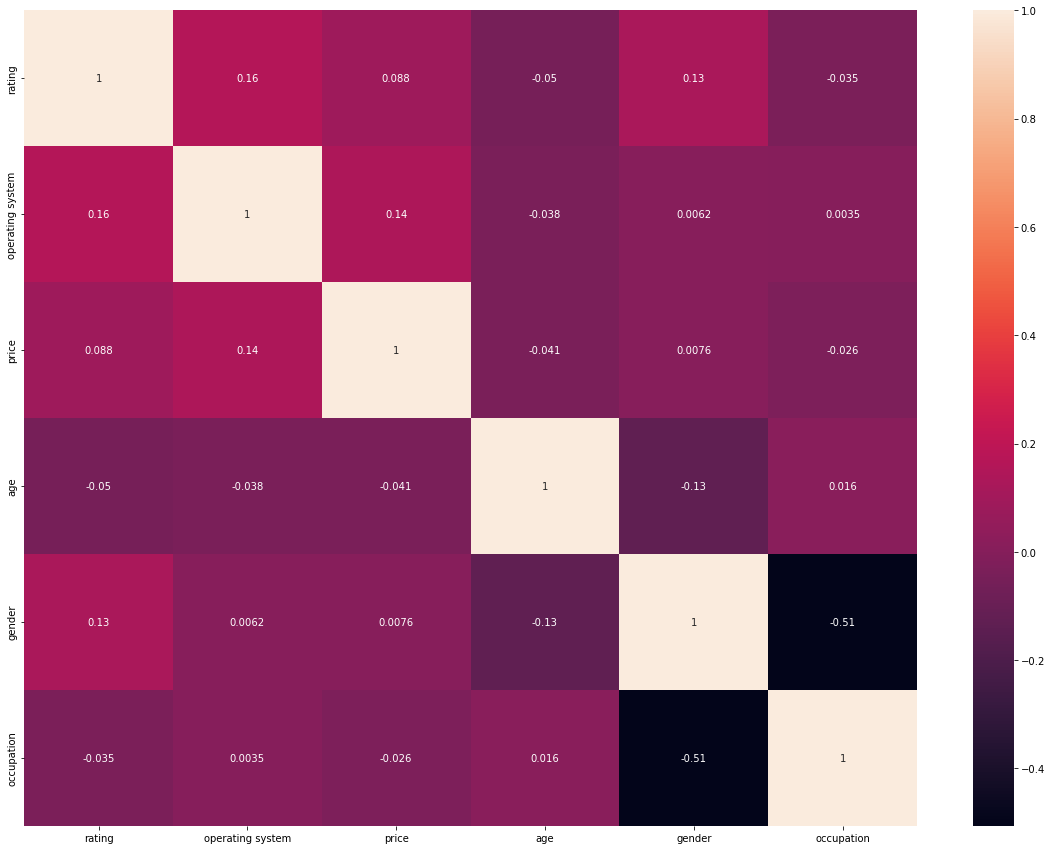

In [187]:
plt.figure(figsize=(20,15))
sns.heatmap(ratings.corr(), annot=True)

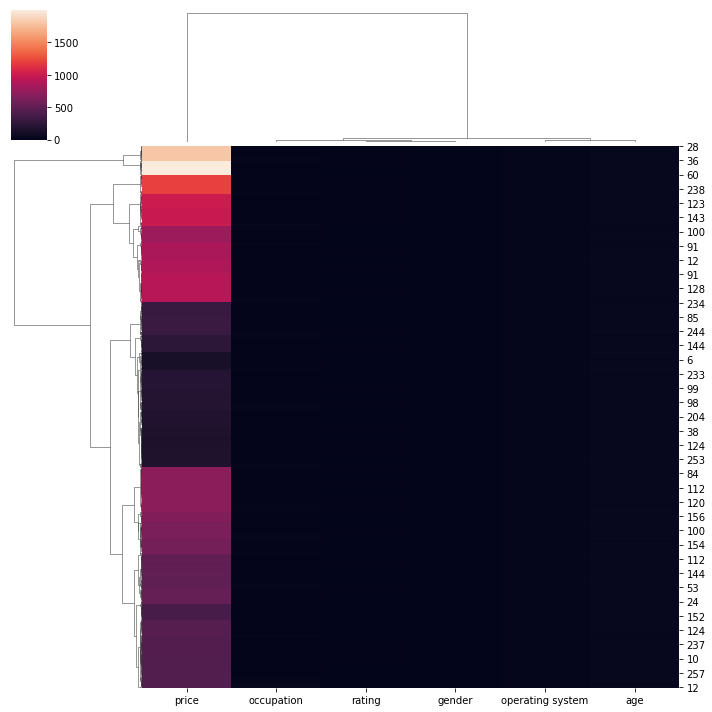

In [188]:
sns.clustermap(ratings)

In [189]:
## Splitting the data into test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ratings, ratings_pred, test_size=0.33, random_state=42)

In [190]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [191]:
#Initialize the ANN

classifier = Sequential()

In [192]:
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform',input_shape=(X_train.shape[1],)))

In [193]:
classifier.add(Dense(6, activation='relu', kernel_initializer='glorot_uniform'))

In [194]:
classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))

In [195]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [196]:
train_data = tf.data.Dataset.from_tensor_slices((X_train, y_train))
valid_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
67/67 [==============================] - 3s 5ms/step - loss: 381.4819 - accuracy: 0.0166
Epoch 2/100
67/67 [==============================] - 0s 6ms/step - loss: 28.4993 - accuracy: 0.0211
Epoch 3/100
67/67 [==============================] - 1s 8ms/step - loss: -1.7178 - accuracy: 0.0287
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: -2.8715 - accuracy: 0.0287
Epoch 5/100
67/67 [==============================] - 0s 7ms/step - loss: -3.9244 - accuracy: 0.0287
Epoch 6/100
67/67 [==============================] - 0s 6ms/step - loss: -4.9622 - accuracy: 0.0287
Epoch 7/100
67/67 [==============================] - 0s 5ms/step - loss: -5.9938 - accuracy: 0.0287
Epoch 8/100
67/67 [==============================] - 1s 8ms/step - loss: -7.0192 - accuracy: 0.0287
Epoch 9/100
67/67 [==============================] - 0s 7ms/step - loss: -8.0402 - accuracy: 0.0287
Epoch 10/100
67/67 [==============================] - 0s 5ms/step - loss: -9.0654 - accuracy: 0.028

In [197]:
y_pred = classifier.predict(X_test)

11/11 [==============================] - 0s 4ms/step


In [198]:
X_test['cellphone_id'] = y_pred

In [199]:
## JOINING THE DATA

X_test = X_test.set_index('cellphone_id').join(data)

In [200]:
X_test

,rating,operating system,price,age,gender,occupation,cellphone_id,brand,model,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,release date
0.998573,8.0,22.0,312.0,32.00000,1.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,10.0,22.0,199.0,32.84375,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,8.0,23.0,1199.0,32.84375,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,4.0,22.0,189.0,25.00000,1.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,5.0,22.0,159.0,25.00000,1.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.998573,8.0,22.0,312.0,32.84375,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,5.0,22.0,159.0,32.84375,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,10.0,23.0,999.0,38.00000,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.998573,9.0,22.0,840.0,25.00000,1.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
df = pd.DataFrame(columns=['rating','operating system', 'price', 'age', 'gender', 'occupation'])
parts = int(input("Enter the number of cellphones:"))

for _ in range(parts):
    rate = int(input("Enter your dream phone's rating (1-10) : "))
    os = input("Enter your operating system :")
    bd = float(input("Enter your budget (in USD) :"))
    ag = int(input("Enter your age :"))
    gd = input("Enter your gender:")
    oc = input("Enter your occupation")
    df1 = pd.DataFrame(data=[[rate,os,bd,ag,gd,oc]],columns=['rating','operating system', 'price', 'age', 'gender', 'occupation'])
    df = pd.concat([df,df1], axis=0)

df.index = range(len(df.index))

In [202]:
df

,rating,operating system,price,age,gender,occupation
0,7,iOS,690.0,20,male,IT


In [203]:
df.dtypes

rating               object
operating system     object
price               float64
age                  object
gender               object
occupation           object
dtype: object

In [204]:
df['occupation'] = df['occupation'].fillna('jobless')
df['operating system'] = df['operating system'].fillna('Android')
df['gender'] = df['gender'].fillna(2)
df['rating'] = df['rating'].fillna(10)
df['age'] = df['age'].fillna(ratings['age'].mean())
df['price'] = df['price'].fillna(ratings['price'].mean())

In [205]:
df['operating system'] = df['operating system'].apply(alphabet_to_number)

In [206]:
df['occupation'] = df['occupation'].apply(alphabet_to_number)

In [207]:
df['gender'] = df['gender'].apply(gender_null)

In [208]:
object_data = ['operating system', 'occupation']
all_objects = []
for rows in ratings[object_data].fillna(" ").values.tolist():
    for phrases in rows:
        all_objects.append(phrases)
all_objects = list(set(all_objects))

In [209]:
df

,rating,operating system,price,age,gender,occupation
0,7,23,690.0,20,1,9


In [210]:
df = df.astype(np.float32)

In [211]:
df_pred = classifier.predict(df)

1/1 [==============================] - 0s 54ms/step


In [212]:
df['cellphone_id'] = df_pred

In [213]:
## JOINING THE DATA

df = df.set_index('cellphone_id').join(data)

In [214]:
df

,rating,operating system,price,age,gender,occupation,cellphone_id,brand,model,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,release date
cellphone_id,,,,,,,,,,,,,,,,,,
0.9985725283622742,7.0,23.0,690.0,20.0,1.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
